(480, 640, 3)


(-0.5, 639.5, 479.5, -0.5)

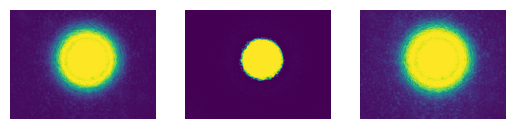

In [186]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# image = Image.open('gaussian_2point88uW.jpg')
image_array = np.array(image)

print(image_array.shape)
plt.subplot(1,3 ,1)
plt.imshow(image_array[:, :, 0])
plt.axis("off")
plt.subplot(1,3 ,2)
plt.imshow(image_array[:, :, 1])
plt.axis("off")
plt.subplot(1,3 ,3)
plt.imshow(image_array[:, :, 2])
plt.axis("off")

In [180]:
from skimage.transform import resize
from skimage.io import imsave, imread
from scipy import ndimage
import scipy.optimize as opt
from scipy.ndimage import gaussian_filter


def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, offset):
    theta = 0
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

def curve_fitting(image_array):
    # curve fitting method
    imgR = image_array[:,:,0]
    imgG = image_array[:,:,1]
    imgB = image_array[:,:,2]
    image = (0.7 * imgR) + (0.2 * imgG) + (0.1 * imgB)


    img = image
    x = np.linspace(0, np.shape(img)[1], np.shape(img)[1])
    y = np.linspace(0, np.shape(img)[0], np.shape(img)[0])
    x, y = np.meshgrid(x,y)

    # Apply Gaussian filter using SciPy
    blurred_image = gaussian_filter(img, sigma=10)

    # print("blurred_image")
    # plt.imshow(blurred_image)
    # plt.show()
    max_index = np.argmax(blurred_image)
    max_index_2d = np.unravel_index(max_index, img.shape)
    # print('max_index', max_index_2d)

        
    # ~ initial_guess = (100,320,240,100,100,0)
    initial_guess = (100,max_index_2d[1],max_index_2d[0],100,100,0)
    # print('initial_guess', initial_guess)

    # print('try fit')
        
    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), img.ravel(), p0=initial_guess, maxfev=2000)
    # print('fit', popt)
    err = np.sqrt(np.diagonal(pcov))
    # print('err', err)

    global x_center, y_center, x_sig, y_sig
        
    x_center = popt[1]
    y_center = popt[2]
    x_sig = abs(popt[3])
    y_sig = abs(popt[4])

    # plt.scatter(x_center, y_center, color="red", s=4)
    # plt.imshow(image)
    # plt.show()

    return x_center, y_center

In [182]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def find_centre_gaus(image_array):
    image_array_max = (image_array <= image_array.max()) & (image_array > (image_array.max() - image_array.max()/4))
    index_horizontal = np.array(range(0, image_array_max.shape[1]))
    image_array_weighted_horizontal = index_horizontal * image_array_max
    image_array_weighted_horizontal_filtered = image_array_weighted_horizontal[image_array_weighted_horizontal > 0]
    avg_horizontal = np.average(image_array_weighted_horizontal_filtered)
    # print("horizontal: ", avg_horizontal)

    index_vetical = np.array(range(0, image_array_max.shape[0]))
    image_array_weighted_vetical = index_vetical * image_array_max.transpose() # transposed to rotate 90 degrees
    image_array_weighted_vetical_filtered = image_array_weighted_vetical[image_array_weighted_vetical > 0]
    avg_vetical = np.average(image_array_weighted_vetical_filtered)
    # print("vertical: ", avg_vetical)

    # print("image array")
    # plt.imshow(image_array)
    # plt.show()
    # plt.figure()
    # plt.scatter(avg_horizontal, avg_vetical, color="red", s=4)
    # print("image array max threshold")
    # plt.imshow(image_array_max)
    # plt.show()

    return avg_horizontal, avg_vetical

def plot_img(image_array):
    # print(image_array.shape)
    plt.figure()
    plt.subplot(1,3 ,1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.imshow(image_array[:, :, 0])
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis("off")
    plt.subplot(1,3 ,2)
    plt.imshow(image_array[:, :, 1])
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis("off")
    plt.subplot(1,3 ,3)
    plt.imshow(image_array[:, :, 2])
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis("off")
    plt.show()



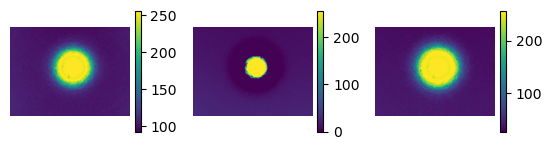

In [166]:
image = Image.open('6cm_from_mirror/gaussian_10uW.jpg')
image_array = np.array(image)

# image_array = image_array[100:300, 300:500, :]

plot_img(image_array=image_array)


single channel centre finding
blurred_image


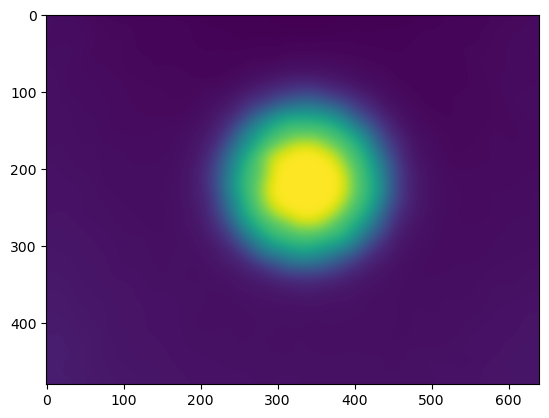

max_index (220, 337)
initial_guess (100, 337, 220, 100, 100, 0)
try fit
fit [217.86974968 337.14667471 219.60702918  64.69294851  63.28008573
  77.11197151]
err [0.09401422 0.02791486 0.02730532 0.02960631 0.02893903 0.01661546]
horizontal:  337.06635318704286
vertical:  219.2055381400209
x_center:  337.06635318704286   y_center:  219.2055381400209
x_curve:  337.1466747144016   y_curve:  219.60702917535312


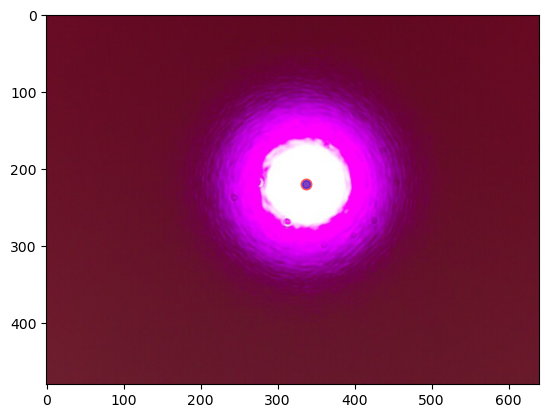

In [ ]:
print("single channel centre finding")
x_curve, y_curve = curve_fitting(image_array=image_array)
x_center, y_center = find_centre_gaus(image_array=image_array[:,:,1])

print("x_center: ", x_center, "  y_center: ", y_center)
print("x_curve: ", x_curve, "  y_curve: ", y_curve)

plt.imshow(image_array)
plt.scatter(x_center, y_center, s=60, color="red", alpha=0.5)
plt.scatter(x_curve, y_curve, s=30, color="blue", alpha=0.5)
# print("weighted sum channel centre finding")
# find_centre_gaus(image_array=image)

# image = Image.open('gaussian_3uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])

# image = Image.open('gaussian_5uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])

# image = Image.open('gaussian_10uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])

# image = Image.open('gaussian_50uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])

# image = Image.open('gaussian_100uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])

# image = Image.open('gaussian_200uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])

# image = Image.open('gaussian_500uW.jpg')
# image_array = np.array(image)
# plot_img(image_array=image_array)
# find_centre_gaus(image_array=image_array[:,:,1])



In [160]:
import numpy as np
test = np.array([[0,0,1], [0,1,1], [1,1,1], [1, 0, 0]])
print(test)

index_vertical = np.array(range(0, test.shape[1]))
print()
print(index_vertical)
print()
print(index_vertical * test)

print()
print("--------------------")
index_horizontal = np.array(range(0, test.shape[0]))
print(index_horizontal)
test2 = index_horizontal * test.transpose()
print()
print(test2.transpose())


[[0 0 1]
 [0 1 1]
 [1 1 1]
 [1 0 0]]

[0 1 2]

[[0 0 2]
 [0 1 2]
 [0 1 2]
 [0 0 0]]

--------------------
[0 1 2 3]

[[0 0 0]
 [0 1 1]
 [2 2 2]
 [3 0 0]]


6cm_from_mirror/gaussian_3uW.jpg


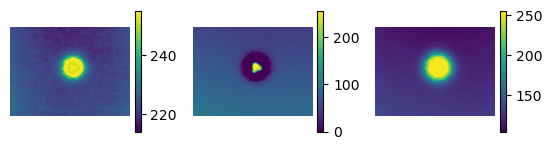

x_mean:  336.86375838926176   y_mean:  220.87046979865772  time: 0.0018
x_curve:  337.5612054696716   y_curve:  221.44864918378732  time: 0.36


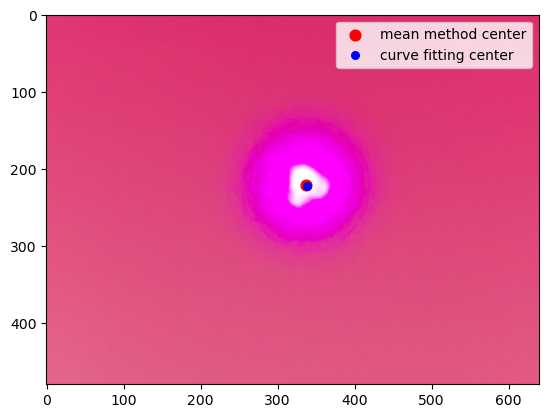

---------------------
6cm_from_mirror/gaussian_5uW.jpg


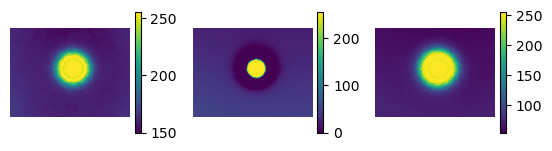

x_mean:  336.9702863317126   y_mean:  220.92666126418152  time: 0.0017
x_curve:  337.1495968367506   y_curve:  220.96737455306027  time: 0.34


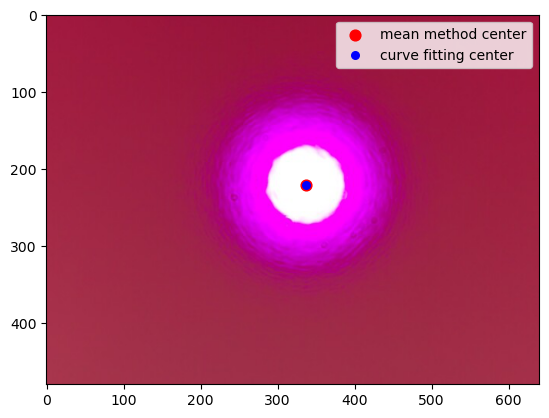

---------------------
6cm_from_mirror/gaussian_6uW.jpg


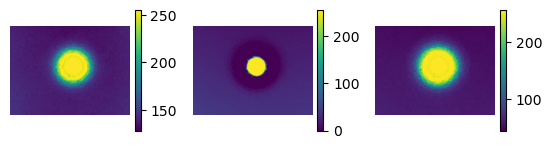

x_mean:  337.1273698943886   y_mean:  220.7289731518005  time: 0.0017
x_curve:  337.21685186275784   y_curve:  220.57686672572328  time: 0.38


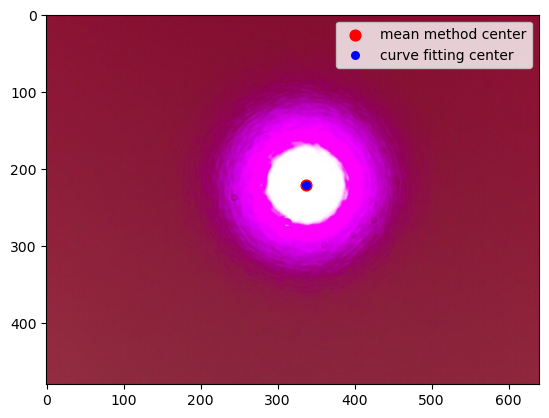

---------------------
6cm_from_mirror/gaussian_10uW.jpg


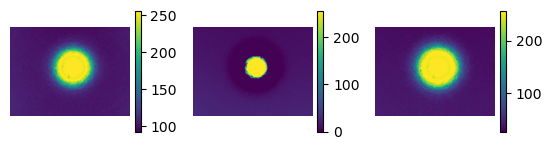

x_mean:  337.06635318704286   y_mean:  219.2055381400209  time: 0.0018
x_curve:  337.1466747144016   y_curve:  219.60702917535312  time: 0.43


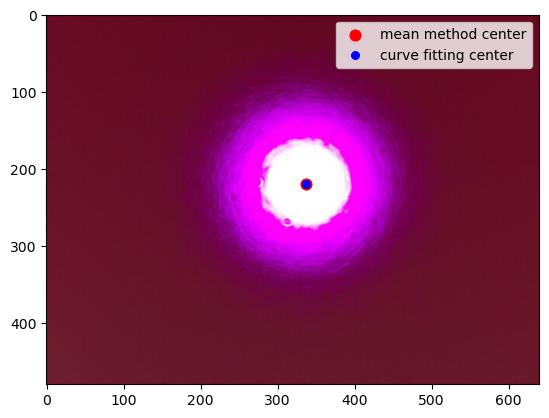

---------------------
6cm_from_mirror/gaussian_13uW.jpg


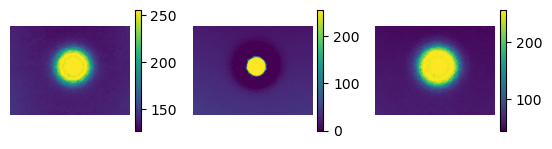

x_mean:  337.13384223918575   y_mean:  220.69643765903308  time: 0.0016
x_curve:  337.1966447274303   y_curve:  220.57406434949974  time: 0.41


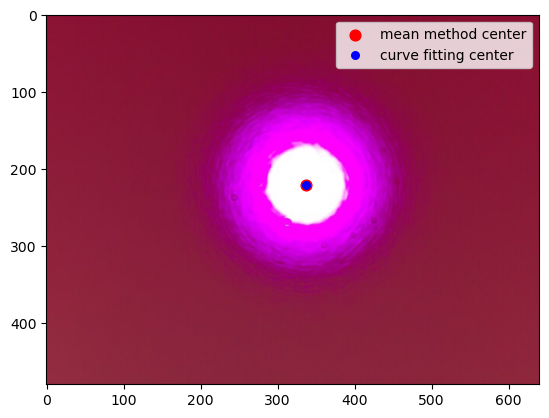

---------------------
6cm_from_mirror/gaussian_50uW.jpg


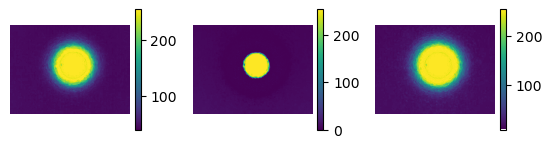

x_mean:  337.60701199798837   y_mean:  219.95028378475465  time: 0.0016
x_curve:  338.0741818324901   y_curve:  218.9196570198962  time: 0.39


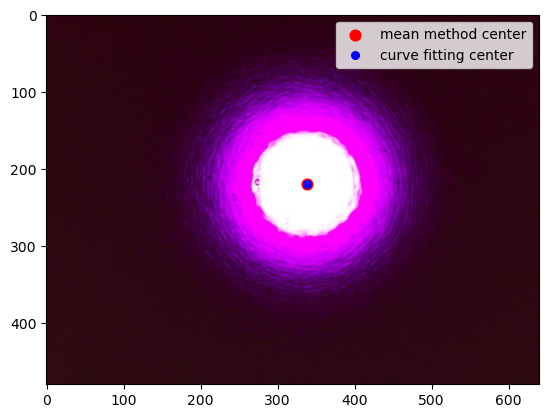

---------------------
6cm_from_mirror/gaussian_100uW.jpg


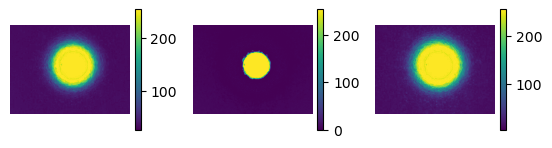

x_mean:  337.76839322801936   y_mean:  219.88658820567687  time: 0.0016
x_curve:  337.88484116592815   y_curve:  218.5292489124683  time: 0.34


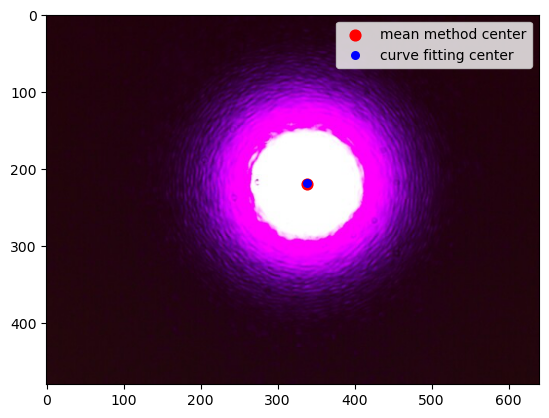

---------------------
6cm_from_mirror/gaussian_150uW.jpg


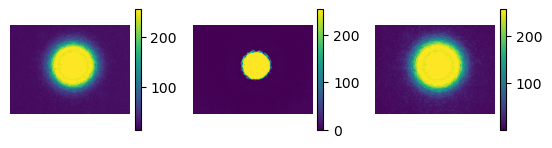

x_mean:  336.29215561593156   y_mean:  221.00635874906064  time: 0.0016
x_curve:  336.81643712027136   y_curve:  219.77919866928866  time: 0.36


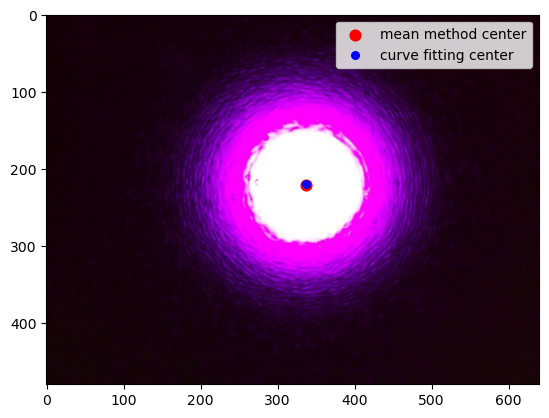

---------------------
6cm_from_mirror/gaussian_200uW.jpg


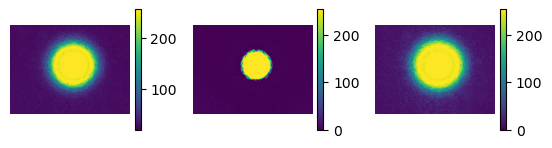

x_mean:  336.9375878093591   y_mean:  218.54301307683994  time: 0.0017
x_curve:  337.79893314482405   y_curve:  218.2780790346654  time: 0.4


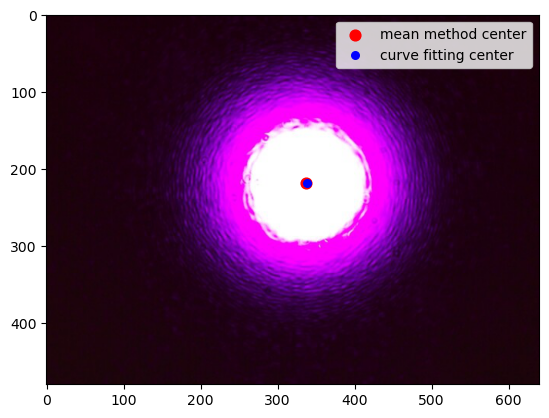

---------------------
6cm_from_mirror/gaussian_500uW.jpg


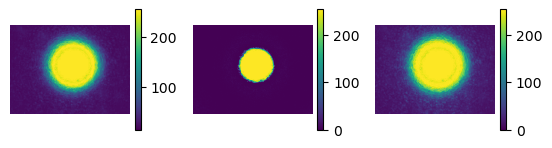

x_mean:  338.2447687779704   y_mean:  218.9710518888844  time: 0.0015
x_curve:  337.64992174178593   y_curve:  217.964948042302  time: 0.34


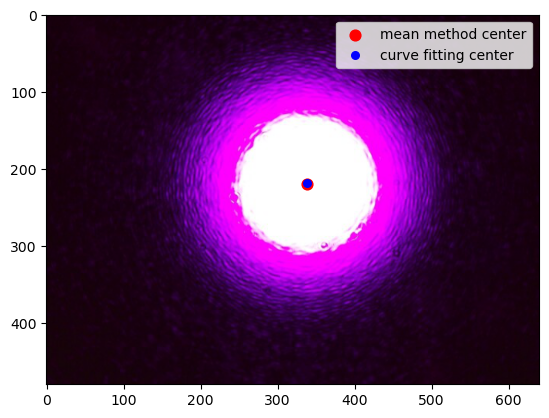

---------------------


In [ ]:
img_path_list = [
    "gaussian_3uW.jpg",
    "gaussian_5uW.jpg",
    "gaussian_6uW.jpg",
    "gaussian_10uW.jpg",
    "gaussian_13uW.jpg",
    "gaussian_50uW.jpg",
    "gaussian_100uW.jpg",
    "gaussian_150uW.jpg",
    "gaussian_200uW.jpg",
    "gaussian_500uW.jpg"
]

# 6cm
for img_path in img_path_list:
    print(f"6cm_from_mirror/{img_path}")
    image = Image.open(f"6cm_from_mirror/{img_path}")
    image_array = np.array(image)
    plot_img(image_array=image_array)

    start_curve = time.perf_counter()
    x_curve, y_curve = curve_fitting(image_array=image_array)
    end_curve = time.perf_counter()

    start_mean = time.perf_counter()
    x_mean, y_mean = find_centre_gaus(image_array=image_array[:,:,1])
    end_mean = time.perf_counter()
    print("x_mean: ", x_mean, "  y_mean: ", y_mean, f" time: {end_mean - start_mean:.2}")
    print("x_curve: ", x_curve, "  y_curve: ", y_curve, f" time: {end_curve - start_curve:.2}")

    plt.imshow(image_array)
    plt.scatter(x_mean, y_mean, s=60, color="red", alpha=1, label="mean method center")
    plt.scatter(x_curve, y_curve, s=30, color="blue", alpha=1, label="curve fitting center")
    plt.legend()
    plt.show()
    print("---------------------")
    

3cm_from_mirror/gaussian_3uW.jpg


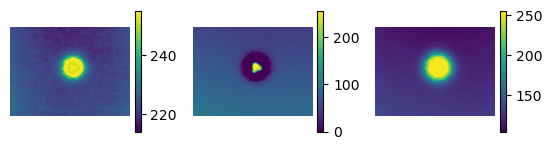

x_mean:  336.86375838926176   y_mean:  220.87046979865772  time: 0.0024
x_curve:  337.5612054696716   y_curve:  221.44864918378732  time: 0.35


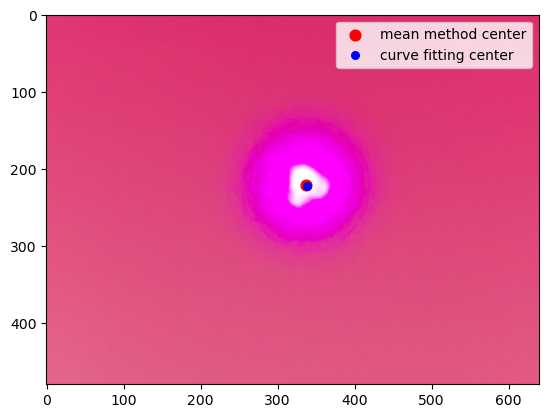

---------------------
3cm_from_mirror/gaussian_5uW.jpg


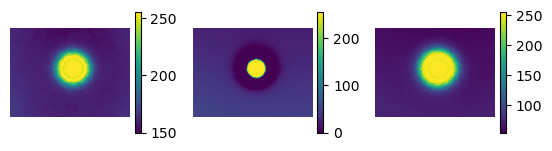

x_mean:  336.9702863317126   y_mean:  220.92666126418152  time: 0.0021
x_curve:  337.1495968367506   y_curve:  220.96737455306027  time: 0.35


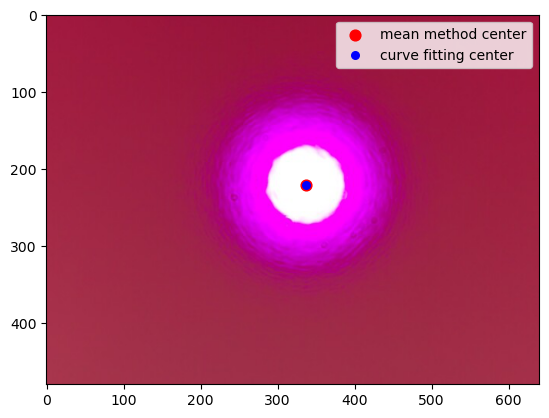

---------------------
3cm_from_mirror/gaussian_6uW.jpg


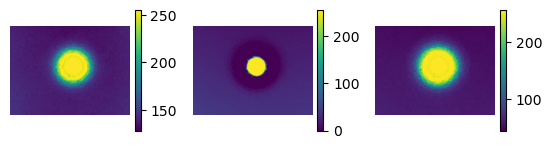

x_mean:  337.1273698943886   y_mean:  220.7289731518005  time: 0.0019
x_curve:  337.21685186275784   y_curve:  220.57686672572328  time: 0.43


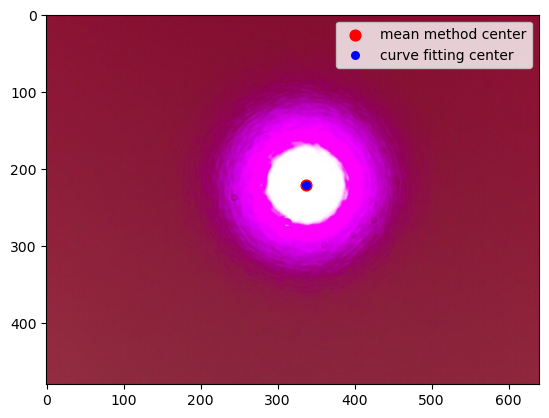

---------------------
3cm_from_mirror/gaussian_10uW.jpg


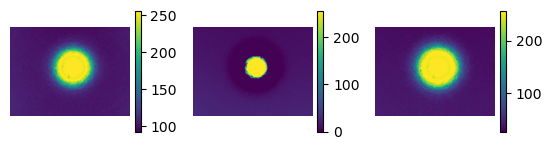

x_mean:  337.06635318704286   y_mean:  219.2055381400209  time: 0.0017
x_curve:  337.1466747144016   y_curve:  219.60702917535312  time: 0.46


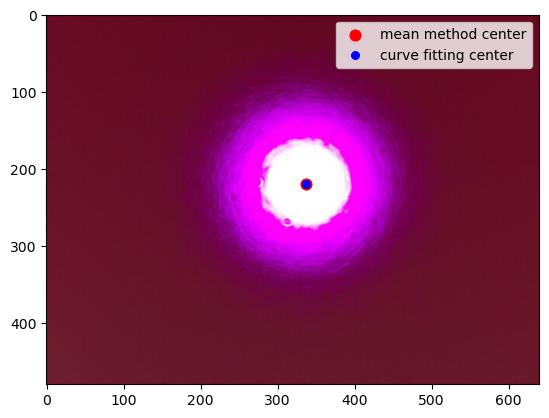

---------------------
3cm_from_mirror/gaussian_13uW.jpg


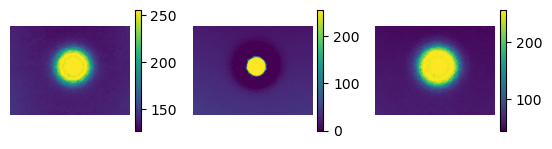

x_mean:  337.13384223918575   y_mean:  220.69643765903308  time: 0.0021
x_curve:  337.1966447274303   y_curve:  220.57406434949974  time: 0.45


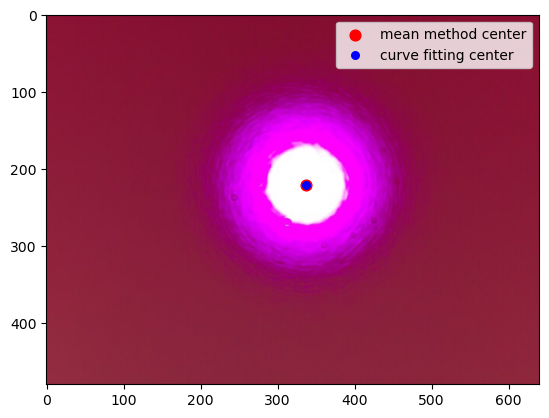

---------------------
3cm_from_mirror/gaussian_50uW.jpg


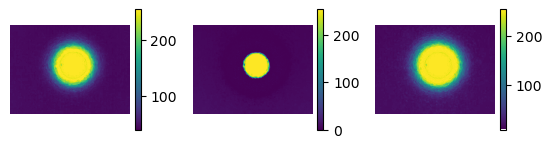

x_mean:  337.60701199798837   y_mean:  219.95028378475465  time: 0.0018
x_curve:  338.0741818324901   y_curve:  218.9196570198962  time: 0.47


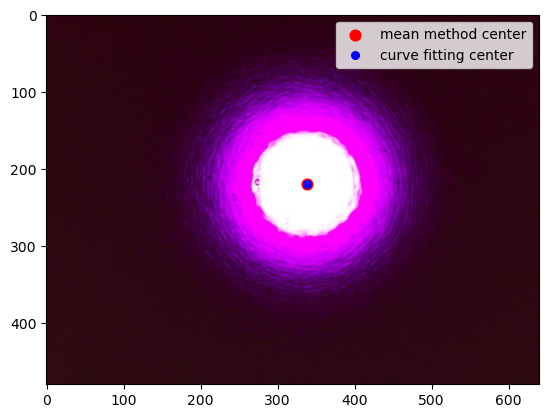

---------------------
3cm_from_mirror/gaussian_100uW.jpg


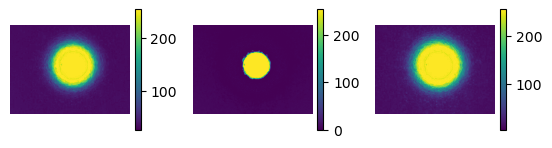

x_mean:  337.76839322801936   y_mean:  219.88658820567687  time: 0.0022
x_curve:  337.88484116592815   y_curve:  218.5292489124683  time: 0.4


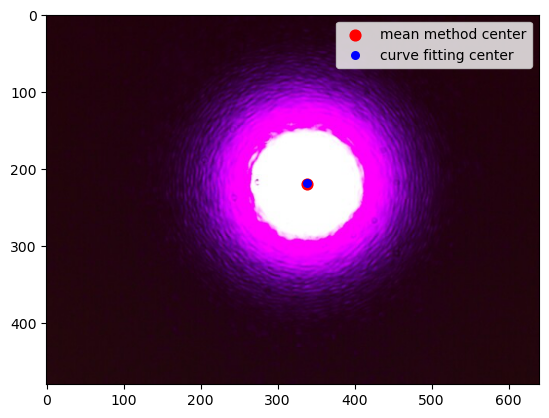

---------------------
3cm_from_mirror/gaussian_150uW.jpg


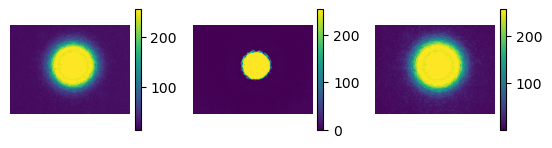

x_mean:  336.29215561593156   y_mean:  221.00635874906064  time: 0.0017
x_curve:  336.81643712027136   y_curve:  219.77919866928866  time: 0.35


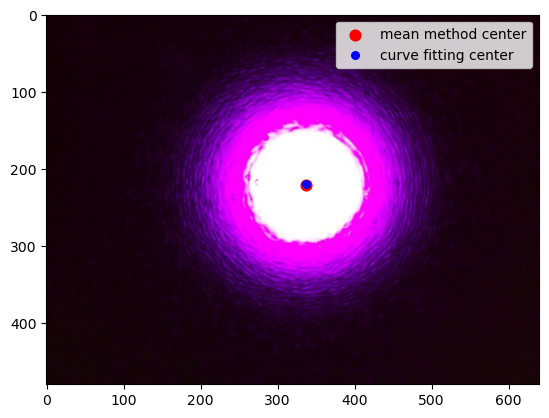

---------------------
3cm_from_mirror/gaussian_200uW.jpg


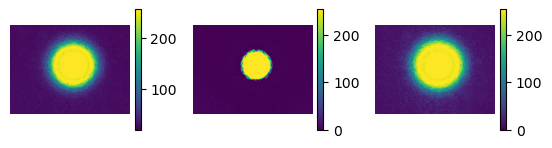

x_mean:  336.9375878093591   y_mean:  218.54301307683994  time: 0.0032
x_curve:  337.79893314482405   y_curve:  218.2780790346654  time: 0.46


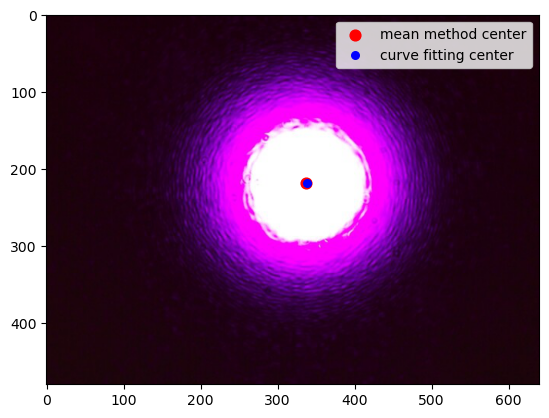

---------------------
3cm_from_mirror/gaussian_500uW.jpg


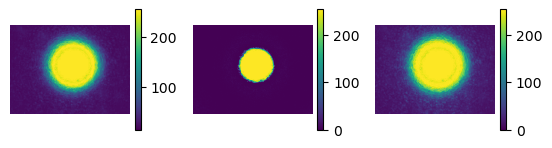

x_mean:  338.2447687779704   y_mean:  218.9710518888844  time: 0.0019
x_curve:  337.64992174178593   y_curve:  217.964948042302  time: 0.4


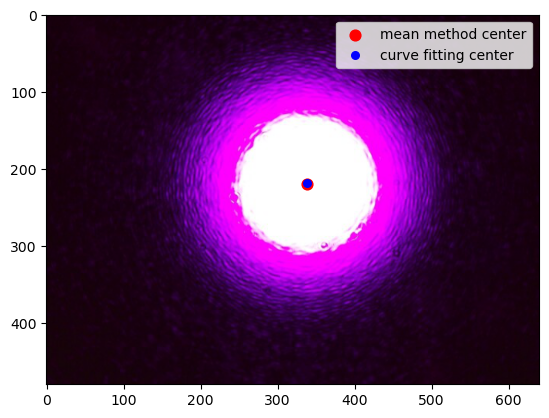

---------------------


In [204]:
img_path_list = [
    "gaussian_3uW.jpg",
    "gaussian_5uW.jpg",
    "gaussian_6uW.jpg",
    "gaussian_10uW.jpg",
    "gaussian_13uW.jpg",
    "gaussian_50uW.jpg",
    "gaussian_100uW.jpg",
    "gaussian_150uW.jpg",
    "gaussian_200uW.jpg",
    "gaussian_500uW.jpg"
]

# 3cm
for img_path in img_path_list:
    print(f"3cm_from_mirror/{img_path}")
    image = Image.open(f"6cm_from_mirror/{img_path}")
    image_array = np.array(image)
    plot_img(image_array=image_array)

    start_curve = time.perf_counter()
    x_curve, y_curve = curve_fitting(image_array=image_array)
    end_curve = time.perf_counter()

    start_mean = time.perf_counter()
    x_mean, y_mean = find_centre_gaus(image_array=image_array[:,:,1])
    end_mean = time.perf_counter()
    print("x_mean: ", x_mean, "  y_mean: ", y_mean, f" time: {end_mean - start_mean:.2}")
    print("x_curve: ", x_curve, "  y_curve: ", y_curve, f" time: {end_curve - start_curve:.2}")

    plt.imshow(image_array)
    plt.scatter(x_mean, y_mean, s=60, color="red", alpha=1, label="mean method center")
    plt.scatter(x_curve, y_curve, s=30, color="blue", alpha=1, label="curve fitting center")
    plt.legend()
    plt.show()
    print("---------------------")
    